In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, gamma, binom

import stub_functs as sf

# Test many, many iterations.

In [36]:
bandit_many = sf.Bandits(run_id='test_many',confidence_modifier=0.2)

In [37]:
bandit_many.run_algorithm_once('lever_a',0.47)

lever_a doesn't exist! Initialize it first? (y/n):  y



Adding lever lever_a...


'lever_a'

In [38]:
bandit_many.run_algorithm_once('lever_b',0.48)

lever_b doesn't exist! Initialize it first? (y/n):  y



Adding lever lever_b...


'lever_b'

In [39]:
bandit_many.run_algorithm_once('lever_c',0.49)

lever_c doesn't exist! Initialize it first? (y/n):  y



Adding lever lever_c...


'lever_c'

In [40]:
bandit_many.run_algorithm_once('lever_d',0.5)

lever_d doesn't exist! Initialize it first? (y/n):  y



Adding lever lever_d...


'lever_d'

In [41]:
key = {'lever_a':0.47,'lever_b':0.48,'lever_c':0.49,'lever_d':0.5}

next_pull = 'lever_a'
for i in range(1000):
    print(i,next_pull)
    rand = np.random.uniform(-0.12,0.12)
    next_pull = bandit_many.run_algorithm_once(next_pull, key[next_pull]+rand)

0 lever_a
1 lever_d
2 lever_c
3 lever_b
4 lever_a
5 lever_c
6 lever_c
7 lever_d
8 lever_c
9 lever_d
10 lever_b
11 lever_c
12 lever_d
13 lever_a
14 lever_b
15 lever_c
16 lever_b
17 lever_b
18 lever_d
19 lever_c
20 lever_c
21 lever_d
22 lever_d
23 lever_a
24 lever_a
25 lever_c
26 lever_c
27 lever_c
28 lever_b
29 lever_b
30 lever_b
31 lever_a
32 lever_a
33 lever_d
34 lever_c
35 lever_b
36 lever_a
37 lever_a
38 lever_a
39 lever_a
40 lever_d
41 lever_d
42 lever_c
43 lever_c
44 lever_c
45 lever_a
46 lever_c
47 lever_c
48 lever_c
49 lever_b
50 lever_d
51 lever_d
52 lever_c
53 lever_c
54 lever_b
55 lever_a
56 lever_d
57 lever_d
58 lever_d
59 lever_d
60 lever_d
61 lever_c
62 lever_a
63 lever_c
64 lever_c
65 lever_d
66 lever_a
67 lever_a
68 lever_c
69 lever_b
70 lever_b
71 lever_b
72 lever_a
73 lever_c
74 lever_c
75 lever_c
76 lever_c
77 lever_c
78 lever_d
79 lever_c
80 lever_d
81 lever_b
82 lever_b
83 lever_c
84 lever_c
85 lever_c
86 lever_c
87 lever_c
88 lever_c
89 lever_d
90 lever_d
91 lever_

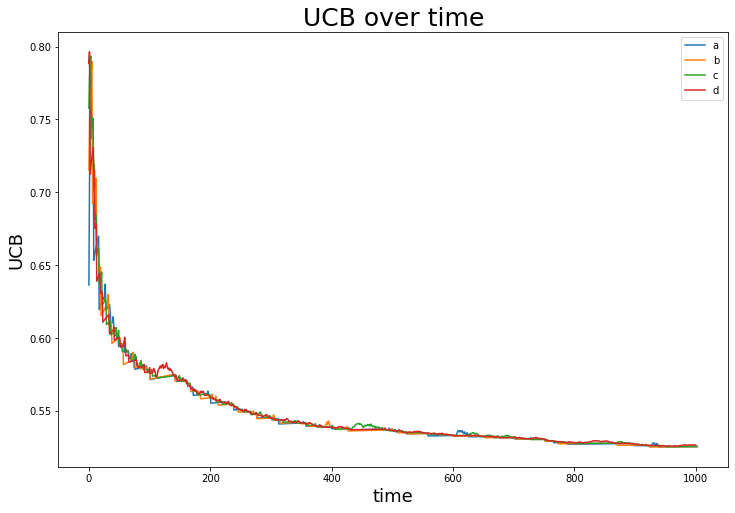

In [42]:
a = bandit_many.ucb_lookup['levers']['lever_a']['ucbs']
b = bandit_many.ucb_lookup['levers']['lever_b']['ucbs']
c = bandit_many.ucb_lookup['levers']['lever_c']['ucbs']
d = bandit_many.ucb_lookup['levers']['lever_d']['ucbs']

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111)
ax.plot(range(len(a)),a,label='a')
ax.plot(range(len(b)),b,label='b')
ax.plot(range(len(c)),c,label='c')
ax.plot(range(len(d)),d,label='d')

ax.set_ylabel('UCB',size=18)
ax.set_xlabel('time',size=18)
ax.set_title('UCB over time',size=25)
plt.legend(loc=0)

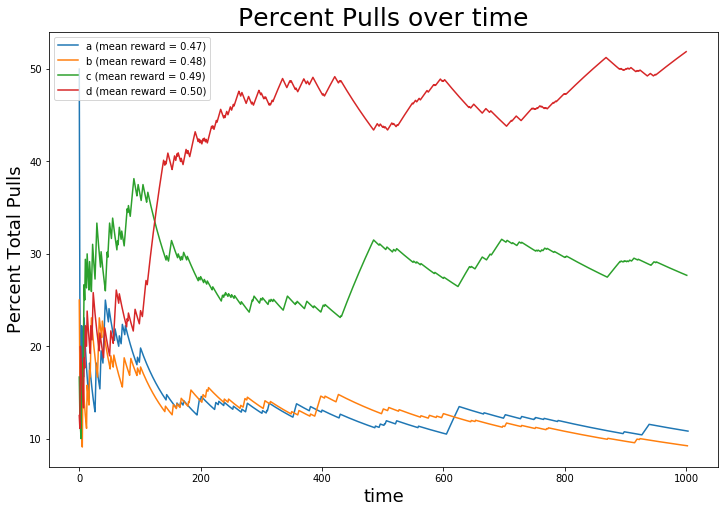

In [43]:
a = bandit_many.ucb_lookup['levers']['lever_a']['percent_pulls']
b = bandit_many.ucb_lookup['levers']['lever_b']['percent_pulls']
c = bandit_many.ucb_lookup['levers']['lever_c']['percent_pulls']
d = bandit_many.ucb_lookup['levers']['lever_d']['percent_pulls']

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111)
ax.plot(range(len(a)),a,label='a (mean reward = 0.47)')
ax.plot(range(len(b)),b,label='b (mean reward = 0.48)')
ax.plot(range(len(c)),c,label='c (mean reward = 0.49)')
ax.plot(range(len(d)),d,label='d (mean reward = 0.50)')

ax.set_ylabel('Percent Total Pulls',size=18)
ax.set_xlabel('time',size=18)
ax.set_title('Percent Pulls over time',size=25)
plt.legend(loc=0)
plt.savefig('pulls-over-time.png',dpi=150)

# Full pipeline with synthetic MTurkers
- Initial run of each query.
    - Set up the synthetic ground truth for each query (pulled from distro).
    - Produce distribution of 10 labelers w/diff acc.
    - Write reward function
    - Perform initial reward calculations
- Iterate through queries
    - Generate new "gorund truth" for each iteration of each query
    - Generate new labels by mTurkers.
- Plots

In [155]:
def multiple_MTurk_accuracy(rate, ground_truth, num_workers):

    '''
    Input: accuracy rate desired for MTurker, ground truth labels and the number
    of MTurk workers

    Description: This function creates dummy response labels for n MTurk workers,
    where n = num_workers. Response labels for each MTurk worker is determined by
    the accuracy rate (rate) provided by the user. For each ground truth label in
    ground_truth, the workers response is determined at random, but with a probability
    equal to the accuracy rate provided.

    Returns: A list of lists. Each list is a single Murk workers' response labels against
    the ground truth labels provided. The number of lists is equal to num_workers.
    '''

    all_MTurker_labels = []

    for i in range(num_workers):

        MTurker_labels = []
        if rate == 1.0:
            MTurker_labels = ground_truth
        else:
            for gt_label in ground_truth:
                if gt_label == 0:
                    MTurker_labels.append(np.random.choice([0, 1], p=[rate, 1.0 - rate]))
                else:
                    MTurker_labels.append(np.random.choice([0, 1], p=[1.0 - rate, rate]))
        all_MTurker_labels.append(MTurker_labels)

    return all_MTurker_labels



def single_MTurk_accuracy(rate, ground_truth):

    '''
    Input: accuracy rate desired for MTurker, ground truth labels

    Description: This function creates dummy response labels for a single MTurk worker.
    Response labels for the worker is determined by the accuracy rate (rate) provided
    by the user. For each ground truth label in ground_truth, the worker's response is
    determined at random, but with a probability equal to the accuracy rate provided.

    Returns: A list of a single Murk workers response labels against
    the ground truth labels provided.
    '''

    MTurker_labels = []
    if rate == 1.0:
        return ground_truth
    else:
        for gt_label in ground_truth:
            if gt_label == 0:
                MTurker_labels.append(np.random.choice([0, 1], p=[rate, 1.0 - rate]))
            else:
                MTurker_labels.append(np.random.choice([0, 1], p=[1.0 - rate, rate]))

    return MTurker_labels


def different_rate_Mturkers(list_of_rates, ground_truth):

    '''
    Input: list of accuracy rates desired for MTurkers, ground truth labels

    Description: This function creates dummy response labels for n MTurk workers,
    where n = len(list_of_rates). Response labels for each MTurk worker is determined by
    the accuracy rate (list_of_rates[i], where i represents a single MTurker) provided
    by the user. For each ground truth label in ground_truth, the workers response
    is determined at random, but with a probability equal to the accuracy rate
    (list_of_rates[i]) provided.

    Returns: A list of lists. Each list is a single Murk workers' response labels against
    the ground truth labels provided. The number of lists is equal to len(list_of_rates).
    '''

    all_worker_results = []

    for rate in list_of_rates:

        single_worker_results = single_MTurk_accuracy(rate, ground_truth)

        all_worker_results.append(single_worker_results)

    return all_worker_results


def fake_MTurk_results_file_generator(Mturkers_data):

    '''
    Input: A list of lists. Each list is a single Murk workers' response labels against
    the ground truth labels provided. The number of lists is equal to the number of workers.

    Description: This function creates a pandadas dataframe and CSV file containing
    Mturker label results.

    Returns: A pandas dataframe and a CSV file. The columns are:
        - WorkerId: Unique id for each worker.
        - HitId: The unique HIT for each label (text data where directive is being
        identified as existing or not).
        - Answer.no.0: Column indicating if labeler said there was NO directive. 1 means
        they marked "no directive", O means otherwise.
        - Answer.yes.1: Column indicating if labeler said there IS a directive present. 1
        means they marked "yes, directive", 0 means otherwise.
    '''

    worker_id = 0

    # each AssignmentId needs to be unique
    AssignmentId = 0

    all_rows = []

    for worker in Mturkers_data:

        worker_id += 1

        hit_id = 0

        for label in worker:

            ### START VARS ###
            AssignmentId += 1

            hit_id += 1

            HITTypeId = "dummy text"
            Title = "dummy text"
            Description = "dummy text"
            Keywords = "dummy text"
            Reward = "dummy text"
            CreationTime = "dummy text"
            MaxAssignments = 99
            RequesterAnnotation = "dummy text"
            AssignmentDurationInSeconds = 99
            AutoApprovalDelayInSeconds = 99
            Expiration = "dummy text"
            NumberOfSimilarHITs = None
            LifetimeInSeconds = None
            #AssignmentId goes here but already create above
            #WorkerId goes here but already create above
            AssignmentStatus = "dummy text"
            AcceptTime = "dummy text"
            SubmitTime = "dummy text"
            AutoApprovalTime = "dummy text"
            ApprovalTime = None
            RejectionTime = None
            RequesterFeedback = None
            WorkTimeInSeconds = np.random.randint(low = 1, high = 100) # generate rand val between 1 and 100
            LifetimeApprovalRate = "dummy text"
            Last30DaysApprovalRate = "dummy text"
            Last7DaysApprovalRate = "dummy text"
            Input_TEXT = "dummy text"
            Answer_Directive_Sentence = "dummy text"
            Answer_no_0 = 0 if label == 1 else 1
            Answer_yes_1 = 1 if label == 1 else 0
            Approve = None
            Reject = None
            ### END VARS ###

            new_row = [hit_id, HITTypeId, Title, Description, Keywords, \
                Reward, CreationTime, MaxAssignments, RequesterAnnotation,\
                    AssignmentDurationInSeconds, AutoApprovalDelayInSeconds,\
                        Expiration, NumberOfSimilarHITs, LifetimeInSeconds,\
                            AssignmentId, worker_id, AssignmentStatus, AcceptTime,\
                                SubmitTime, AutoApprovalTime, ApprovalTime,\
                                    RejectionTime, RequesterFeedback, WorkTimeInSeconds,\
                                        LifetimeApprovalRate, Last30DaysApprovalRate, Last7DaysApprovalRate,\
                                            Input_TEXT, Answer_Directive_Sentence, Answer_no_0,\
                                                Answer_yes_1, Approve, Reject]

            all_rows.append(new_row)

    fake_MTurk_result_file = pd.DataFrame(all_rows, 
    columns=['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.TEXT',
       'Answer.Directive Sentence', 'Answer.no.0', 'Answer.yes.1', 'Approve',
       'Reject'])

    #time_stamp = f"{datetime.datetime.now().year}-{datetime.datetime.now().month}-{datetime.datetime.now().day}-{datetime.datetime.now().hour}{datetime.datetime.now().minute}"

    #fake_MTurk_result_file.to_csv(f"fake_MTurk_results_{time_stamp}.csv", index = False)

    return fake_MTurk_result_file


class SyntheticLever(object):
    
    def __init__(self, name, mean_num_directives, extend, total_samples = 100):
        
        self.name = name
        self.mean_num_directives = mean_num_directives
        self.extend = extend
        self.total_samples = total_samples
        
    def __str__(self):
        
        return f"Lever '{self.name}' has a mean fraction of directives: {self.mean_num_directives} +/- {self.extend}"

    def generate_ground_truth(self):
        p = np.random.uniform(self.mean_num_directives-self.extend, self.mean_num_directives+self.extend)
        return binom.rvs(n=1,p=p,size=self.total_samples)
    
    
def determine_reward(mturk_df):
    ids = mturk_df['HITId']
    labels = mturk_df['Answer.yes.1']
    
    label_dict = {}
    for i,_ in enumerate(ids):
        if ids[i] not in label_dict:
            label_dict[ids[i]] = [labels[i]]
        else:
            label_dict[ids[i]].append(labels[i])
    
    reward_dict = {k: (np.array(v).sum()/len(v)) for k,v in label_dict.items()}

    return np.array(list(reward_dict.values())).sum()/100.0


In [156]:
lever_a = SyntheticLever('a',0.3,0.02)

In [157]:
print(lever_a)

Lever 'a' has a mean fraction of directives: 0.3 +/- 0.02


In [158]:
gt = lever_a.generate_ground_truth()

In [159]:
labels = different_rate_Mturkers([0.95, 0.95, 0.95, 0.95, 0.95, 0.95], gt)

In [160]:
a = fake_MTurk_results_file_generator(labels)

In [161]:
determine_reward(a)

0.32166666666666666

In [221]:
def simulate_pipeline(iterations = 1000, levers={'a':0.27,'b':0.28,'c':0.29,'d':0.30},labelers=[0.75, 0.75, 0.75, 0.75, 0.75, 0.75]):
        
    # Create Bandits object.
    bandits = sf.Bandits(run_id='test_pipeline',confidence_modifier=0.2)
    
    # Initialize levers:
    # First, make the synthetic generators.
    lev = {k: SyntheticLever(k, v, 0.05) for k,v in levers.items()}
    # Then perform initial query for each lever and get MTurk labels.
    for k,lever in lev.items():
        # generate ground truth
        gt = lever.generate_ground_truth()
        # generate labels from labelers
        labels = different_rate_Mturkers(labelers, gt)
        # generate df from MTurk results
        mturk_df = fake_MTurk_results_file_generator(labels)
        # calculate reward
        reward = determine_reward(mturk_df)
        # initialize lever with bandits
        next_lever = bandits.run_algorithm_once(lever.name,reward)
        
    for i in range(iterations):
        
#         print(bandits)
#         print(next_lever)
        if i%100 == 0:
            print(i)
        gt = lev[next_lever].generate_ground_truth()
        labels = different_rate_Mturkers(labelers,gt)
        mturk_df = fake_MTurk_results_file_generator(labels)
        reward = determine_reward(mturk_df)
        next_lever = bandits.run_algorithm_once(lev[next_lever].name, reward)
        
    return bandits
    
        

In [222]:
x = simulate_pipeline()

a doesn't exist! Initialize it first? (y/n):  y



Adding lever a...


b doesn't exist! Initialize it first? (y/n):  y



Adding lever b...


c doesn't exist! Initialize it first? (y/n):  
c doesn't exist! Initialize it first? (y/n):  y



Adding lever c...


d doesn't exist! Initialize it first? (y/n):  y



Adding lever d...
0
100
200
300
400
500
600
700
800
900


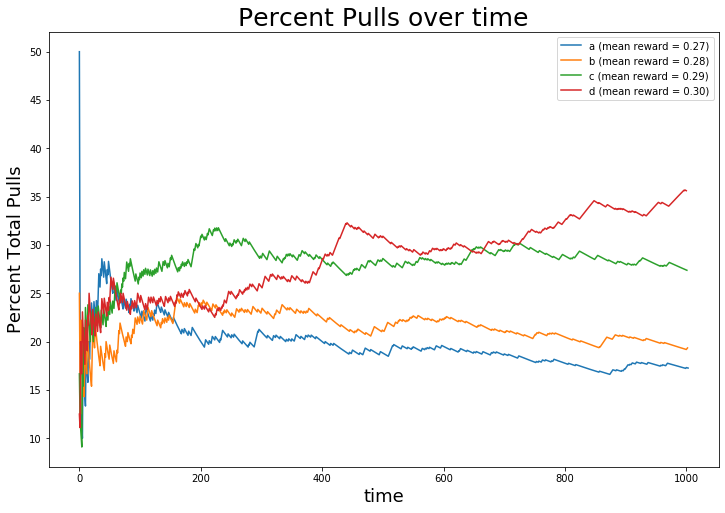

In [223]:
a = x.ucb_lookup['levers']['a']['percent_pulls']
b = x.ucb_lookup['levers']['b']['percent_pulls']
c = x.ucb_lookup['levers']['c']['percent_pulls']
d = x.ucb_lookup['levers']['d']['percent_pulls']

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111)
ax.plot(range(len(a)),a,label='a (mean reward = 0.27)')
ax.plot(range(len(b)),b,label='b (mean reward = 0.28)')
ax.plot(range(len(c)),c,label='c (mean reward = 0.29)')
ax.plot(range(len(d)),d,label='d (mean reward = 0.30)')

ax.set_ylabel('Percent Total Pulls',size=18)
ax.set_xlabel('time',size=18)
ax.set_title('Percent Pulls over time',size=25)
plt.legend(loc=0)
plt.savefig('pulls-over-time_all75.png',dpi=150)